In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
T = 50.0  # 总模拟时间
dt = 0.01  # 时间步长
time = np.arange(0, T, dt)  # 时间点数组
V_th = -50  # 阈值
spike_times = []  # 记录发送脉冲的时间

C_m = 1.0  # 膜电容
g_Na = 120.0  # 钠离子通道最大电导率
g_K = 36.0  # 钾离子通道最大电导率
g_L = 0.3  # 泄漏通道最大电导率
E_Na = 50.0  # 钠离子平衡电位
E_K = -77.0  # 钾离子平衡电位
E_L = -54.387  # 泄漏通道平衡电位
# 基于实验数据和生物神经元的物理特性得出的经验值

I_ext = np.zeros(len(time))
I_ext[int(5 / dt):int(30 / dt)] = 10.0  # 在5ms到30ms施加10μA的电流

V = np.zeros(len(time))
m = np.zeros(len(time))
h = np.zeros(len(time))
n = np.zeros(len(time))
V[0] = -65.0
m[0] = 0.05
h[0] = 0.6
n[0] = 0.32
# 设置初始值

In [8]:
def alpha_m(V):
    return (0.1 * (V + 40)) / (1 - np.exp(-(V + 40) / 10))
    # 钠通道激活速率 当膜电位升高时增大 意味着钠通道更容易打开

def beta_m(V):
    return 4.0 * np.exp(-(V + 65) / 18)
    # 钠通道激活关闭速率 当膜电位降低时增大 钠通道更容易关闭

def alpha_h(V):
    return 0.07 * np.exp(-(V + 65) / 20)
    # 钠通道失活恢复速率 当膜电位降低 时增大 使钠通道逐渐从失活状态中恢复

def beta_h(V):
    return 1.0 / (1 + np.exp(-(V + 35) / 10))
    # 钠通道失活速率 当膜电位升高时增大 使钠通道快速失活

def alpha_n(V):
    return (0.01 * (V + 55)) / (1 - np.exp(-(V + 55) / 10))
    # 钾通道激活速率 当膜电位升高时增大 钾通道逐渐打开

def beta_n(V):
    return 0.125 * np.exp(-(V + 65) / 80)
    # 钾通道关闭速率 当膜电位降低时增大 钾通道更容易关闭

In [9]:
for i in range(1, len(time)):

    a_m = alpha_m(V[i - 1])
    b_m = beta_m(V[i - 1])
    a_h = alpha_h(V[i - 1])
    b_h = beta_h(V[i - 1])
    a_n = alpha_n(V[i - 1])
    b_n = beta_n(V[i - 1])
    # 根据上一时刻的膜电位计算速率

    m[i] = m[i - 1] + dt * (a_m * (1 - m[i - 1]) - b_m * m[i - 1])
    h[i] = h[i - 1] + dt * (a_h * (1 - h[i - 1]) - b_h * h[i - 1])
    n[i] = n[i - 1] + dt * (a_n * (1 - n[i - 1]) - b_n * n[i - 1])
    # 更新门控变量

    I_Na = g_Na * m[i]**3 * h[i] * (V[i - 1] - E_Na)
    I_K = g_K * n[i]**4 * (V[i - 1] - E_K)
    I_L = g_L * (V[i - 1] - E_L)
    # 计算离子电流

    V[i] = V[i - 1] + dt * (I_ext[i - 1] - I_Na - I_K - I_L) / C_m
    # 更新膜电位

    if V[i - 1] < V_th and V[i] >= V_th:
        spike_times.append(time[i])
    # 如果膜电位在这一时刻超过阈值 则记录脉冲发生时间

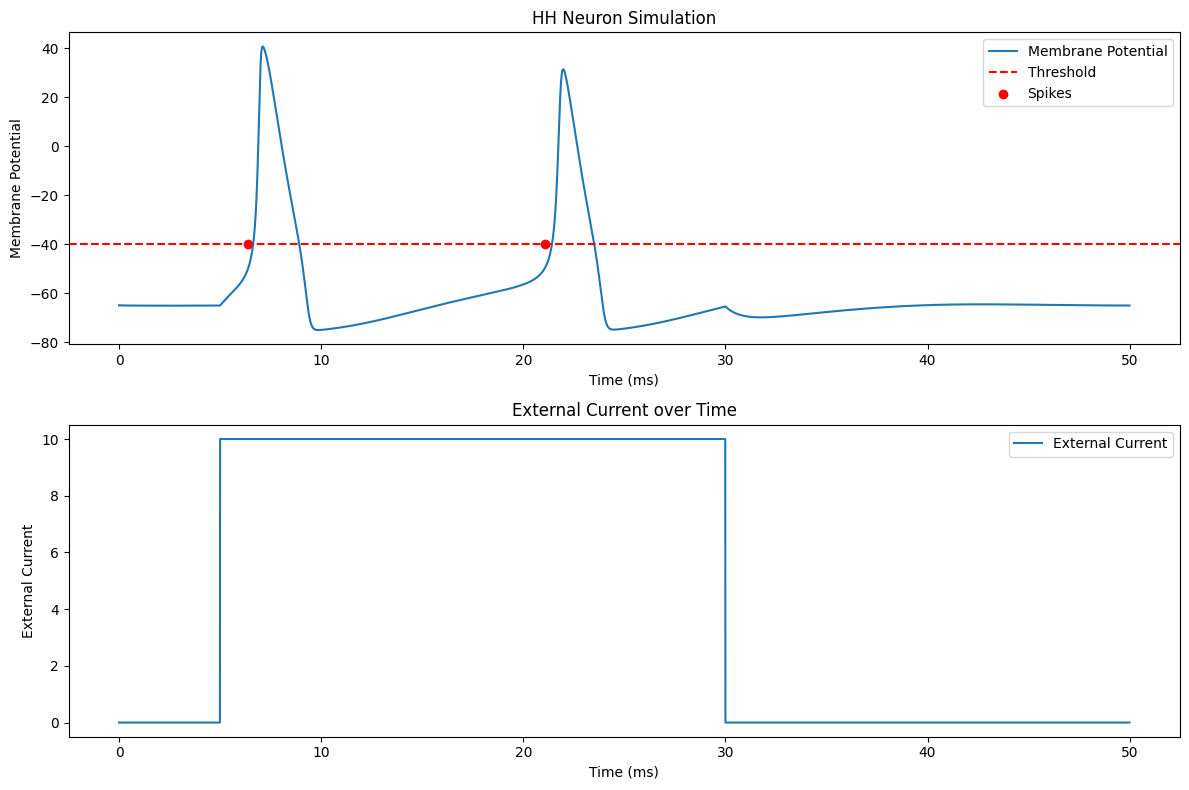

In [10]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(time, V, label="Membrane Potential")
plt.axhline(-40, color='red', linestyle='--', label="Threshold")
plt.scatter(spike_times, [-40] * len(spike_times), color='red', label="Spikes")
plt.title('HH Neuron Simulation')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(time, I_ext, label="External Current")
plt.title('External Current over Time')
plt.xlabel('Time (ms)')
plt.ylabel('External Current')
plt.legend()

plt.tight_layout()
plt.show()